           2              
          S  + 4          
──────────────────────────
 2                        
S  + 1.4142135623731⋅S + 1
2 zeros: [-0.+2.j  0.-2.j]
2 poles: [-0.707+0.70721355j -0.707-0.70721355j]
gain: 1.0


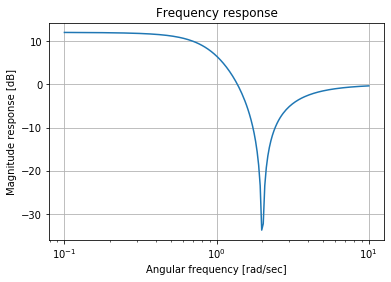

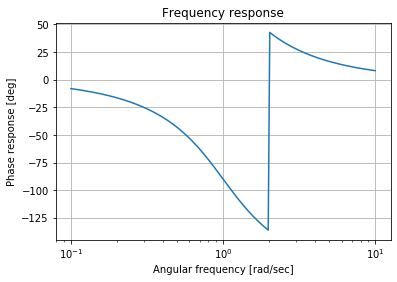

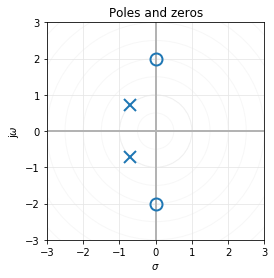

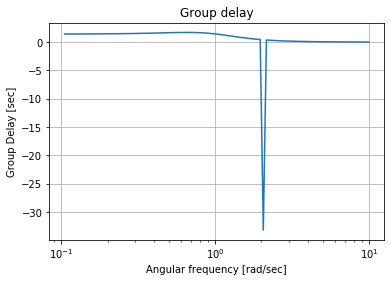

In [13]:
from sympy import *
from scipy import signal


from splane import pzmap, grpDelay, bodePlot
S,R, L, C, a, b, d, A, B, C, D, Y2, y2=symbols("S R L C a b d A B C D Y2 y2")


T=(S**2 +2**2)/((S**2 +2**(1/2)*S +1))
pprint(T)
num1=[1,0,4]
den1 = [1,1.414,1]

sys1=signal.TransferFunction(num1, den1)

bodePlot(sys1)

pzmap(sys1)

grpDelay(sys1);

In [14]:
print("No resuelvo el punto 2 ya que es muy similar a otro ya resuelto en este GIT")

No resuelvo el punto 2 ya que es muy similar a otro ya resuelto en este GIT


In [15]:
Y1= 1/(R/d) + 1/(S*L/b) + S*C*a

Z1=1/Y1
print("Z1 es:")
pprint(simplify(Z1))
Y2= 1/(R/(1-d)) + 1/(S*L/(1-b)) + S*C*(1-a)

Z2=1/Y2

print("Z2 es:")

pprint(simplify(Z2))

T_del_punto_2=Z2/(Z1+Z2)

print("la Transferencia es:")
pprint(simplify(T_del_punto_2))


T_cuad_1= Matrix(([A,B],
                  [C,D]))
print("La matriz T del cuadripolo desconocido es:")
pprint(T_cuad_1)

T_cuad_2= Matrix(([1,0],
                  [y2,1]))
print("La matriz T del cuadripolo de carga es:")
pprint(T_cuad_2)
TT=T_cuad_1*T_cuad_2

print("El cuadripolo total es:")
pprint(TT)

Z1 es:
         L⋅R⋅S          
────────────────────────
       2                
C⋅L⋅R⋅S ⋅a + L⋅S⋅d + R⋅b
Z2 es:
                 -L⋅R⋅S                   
──────────────────────────────────────────
       2                                  
C⋅L⋅R⋅S ⋅(a - 1) + L⋅S⋅(d - 1) + R⋅(b - 1)
la Transferencia es:
       2                
C⋅L⋅R⋅S ⋅a + L⋅S⋅d + R⋅b
────────────────────────
          2             
   C⋅L⋅R⋅S  + L⋅S + R   
La matriz T del cuadripolo desconocido es:
⎡A  B⎤
⎢    ⎥
⎣C  D⎦
La matriz T del cuadripolo de carga es:
⎡1   0⎤
⎢     ⎥
⎣y₂  1⎦
El cuadripolo total es:
⎡A + B⋅y₂  B⎤
⎢           ⎥
⎣C + D⋅y₂  D⎦


Los residuos de aux son:
   S - 1          S + 1    
──────────── + ────────────
 2              2          
S  - 2⋅S + 4   S  + 2⋅S + 4
Elijo unicamente los polos y ceros del semi plano izq, osea:
   S + 1    
────────────
 2          
S  + 2⋅S + 4
1 zeros: [-1.]
2 poles: [-1.+1.73205081j -1.-1.73205081j]
gain: 1.0


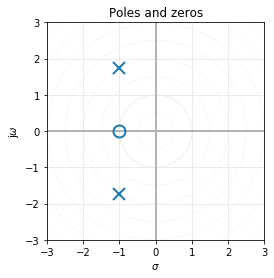

In [16]:
Aux=2*(S**3 +2*S)/(S**4 +4*S**2 +16)

print("Los residuos de aux son:")
pprint(apart(Aux))
print("Elijo unicamente los polos y ceros del semi plano izq, osea:")
pprint((S+1)/(S**2 +2*S+4))
num2=[1,1]
den2 = [1,2,4]

sys2=signal.TransferFunction(num2, den2)

pzmap(sys2)